In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import plot_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import h5py
import os
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt

from mylib.utils import *

In [323]:
batch_size = 20
num_classes = 10
epochs = 5
img_column = 28
img_row = 28

In [225]:
# get data
(x_train, y_train), (x_test, y_test) = load_mnist()
# convert class  vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [397]:
# data-augmentation
x_train_aug = x_train.reshape(x_train.shape[0], img_column, img_row, 1)
datagen = ImageDataGenerator(rotation_range = 45,shear_range=20)
xs = datagen.flow(x_train_aug, y_train, shuffle=False, batch_size=2000, seed=1)

max_img_num = 4
imgs = []
for x in xs:
    imgs.append(x)
    if (len(imgs) % max_img_num == 0):
        break
        
x_train_aug_0 = imgs[0][0].reshape(imgs[0][0].shape[0], img_column * img_row)
x_train_aug_1 = imgs[1][0].reshape(imgs[1][0].shape[0], img_column * img_row)
x_train_aug_2 = imgs[2][0].reshape(imgs[2][0].shape[0], img_column * img_row)
x_train_aug_3 = imgs[3][0].reshape(imgs[3][0].shape[0], img_column * img_row)

x_train_plus = np.concatenate((x_train, x_train_aug_0, x_train_aug_1, x_train_aug_2, x_train_aug_3))
y_train_plus = np.concatenate((y_train, imgs[0][1], imgs[1][1], imgs[2][1], imgs[3][1]))

In [401]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [402]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

In [403]:
history = model.fit(
    x_train_plus,
    y_train_plus,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data = (x_test, y_test)
)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10000 samples, validate on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 3s 332us/step - loss: 0.6420 - acc: 0.7903 - val_loss: 0.3940 - val_acc: 0.8823
Epoch 2/5
10000/10000 [==============================] - 2s 208us/step - loss: 0.2827 - acc: 0.9120 - val_loss: 0.2908 - val_acc: 0.9172
Epoch 3/5
10000/10000 [==============================] - 2s 213us/step - loss: 0.1942 - acc: 0.9379 - val_loss: 0.2983 - val_acc: 0.9182
Epoch 4/5
10000/10000 [==============================] - 2s 211us/step - loss: 0.1459 - acc: 0.9541 - val_loss: 0.3205 - val_acc: 0.9257
Epoch 5/5
10000/10000 [==============================] - 2s 204us/step - loss: 0.1249 - acc: 0.9639 - val_loss: 0.4211 - val_acc: 0.9116
Test loss: 0.421073188264668
Test accuracy: 0.9116


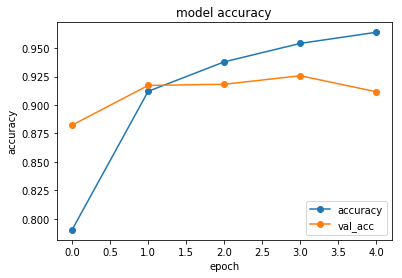

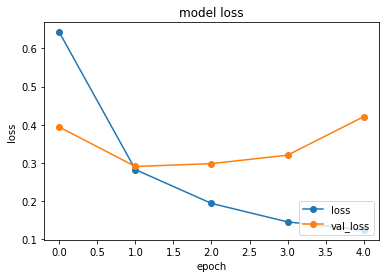

In [404]:
plot_history(history)

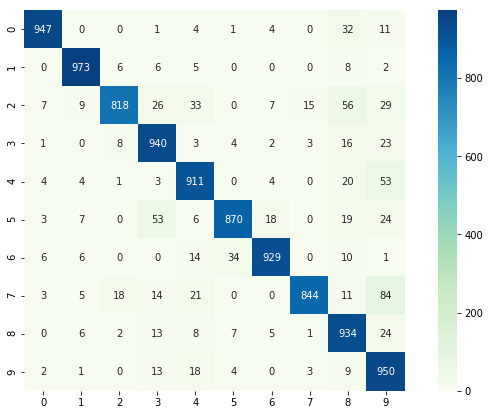

In [405]:
# print Adjacency matrix
predict_classes = model.predict_classes(x_test)
true_classes = np.argmax(y_test, axis=1)
print_cmx(true_classes, predict_classes)

num: 53


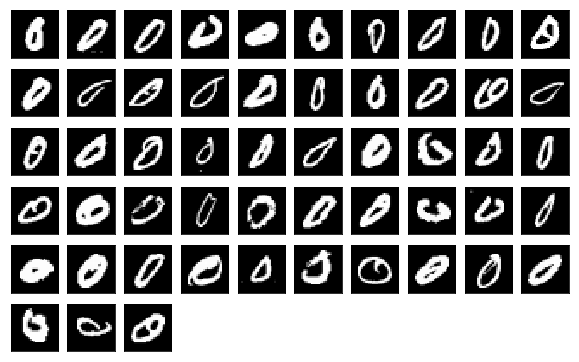

num: 27


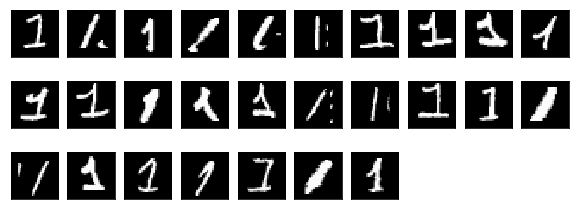

num: 182


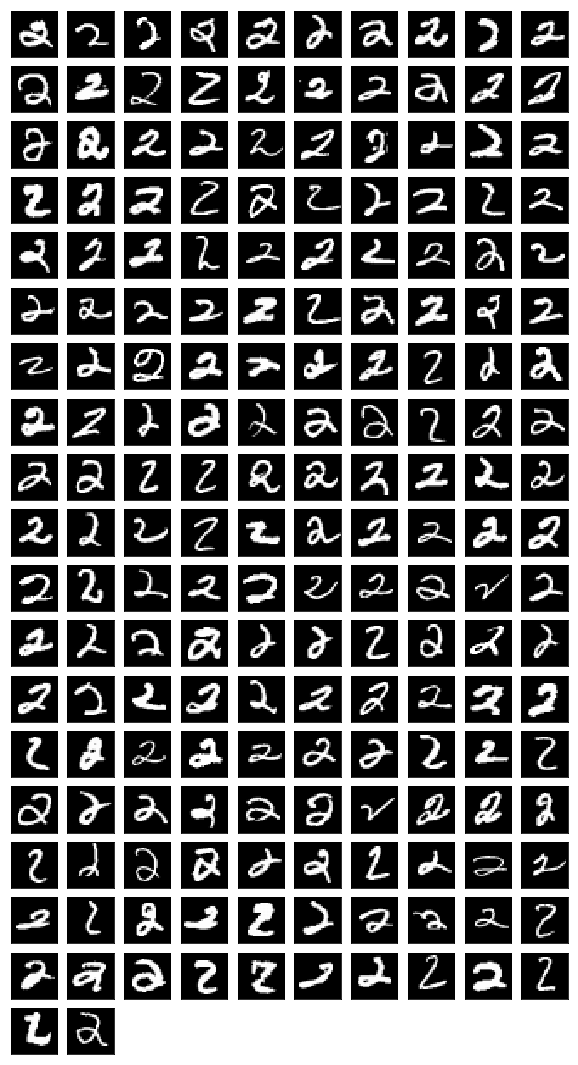

num: 60


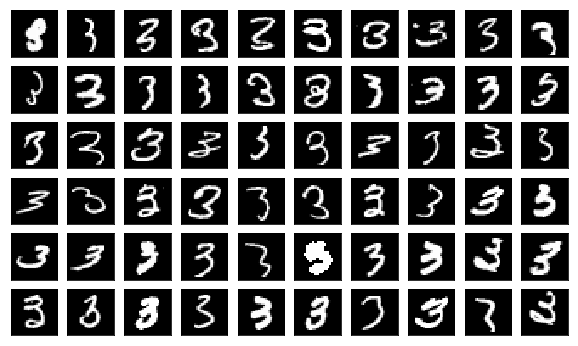

num: 89


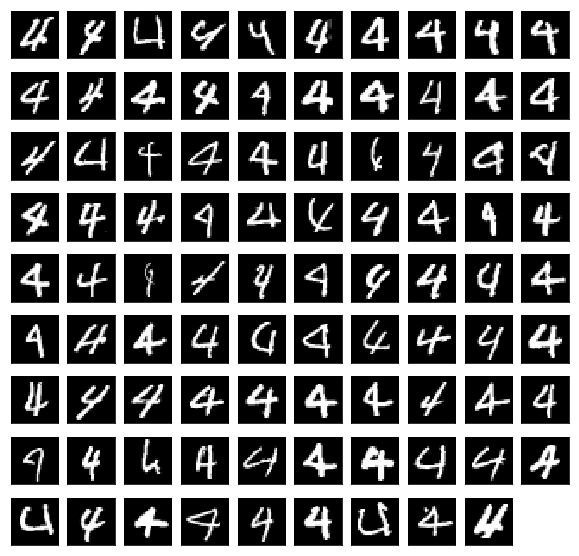

num: 130


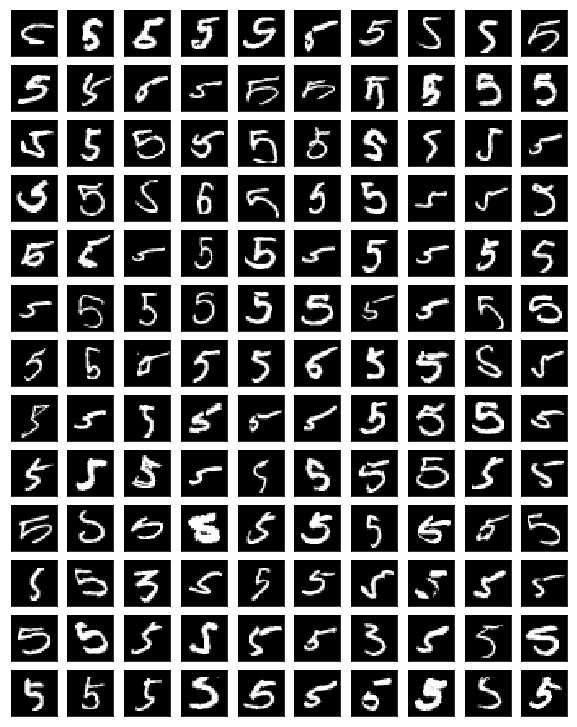

num: 71


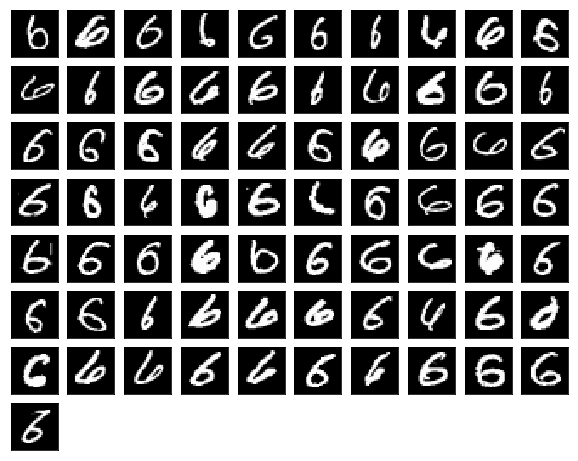

num: 156


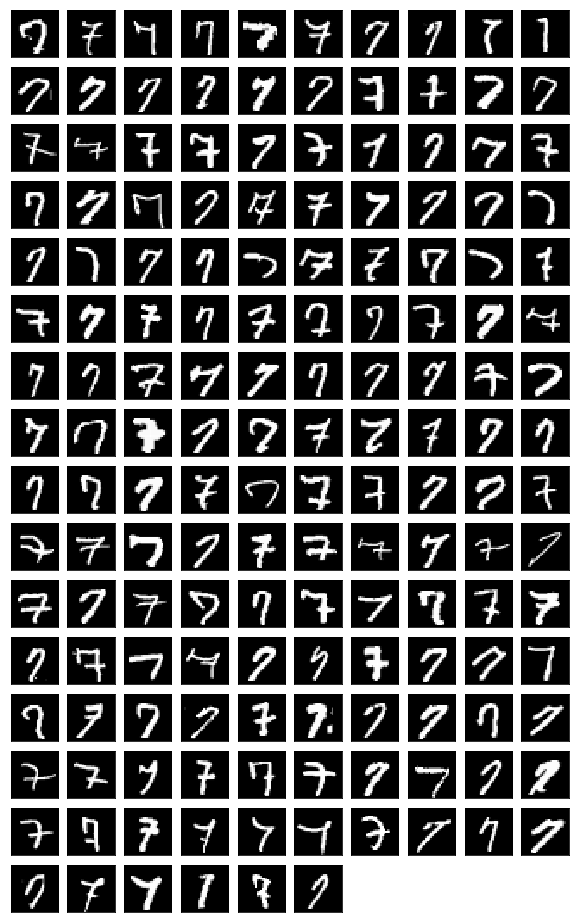

num: 66


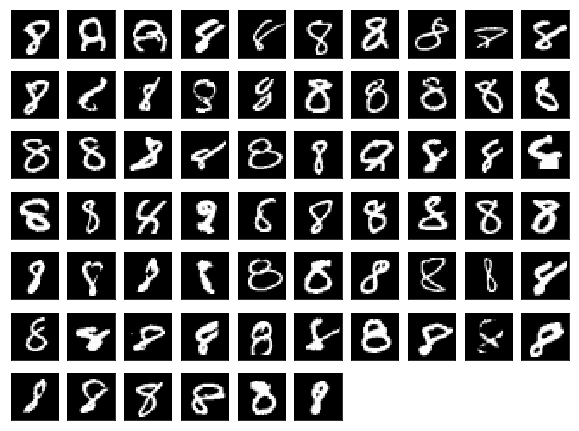

num: 50


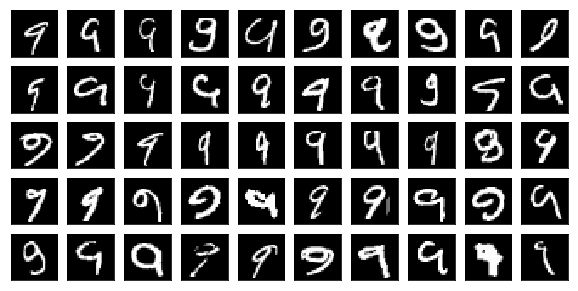

In [409]:
# Display misrecognized data
for i in range(num_classes):
    delta_i = find_index_delta_digit(model, x_test[:10000], y_test[:10000], i)
    print_mnist_img(x_test[delta_i])

In [412]:
# print the recognition rate of each number
for i in range(num_classes):
    index = find_index_digit(y_test, i)
    score = model.evaluate(x_test[index], y_test[index], verbose=0)
    print("{}: {:.3f}".format(i, score[1]))

0: 0.947
1: 0.973
2: 0.818
3: 0.940
4: 0.911
5: 0.870
6: 0.929
7: 0.844
8: 0.934
9: 0.950


num: 200


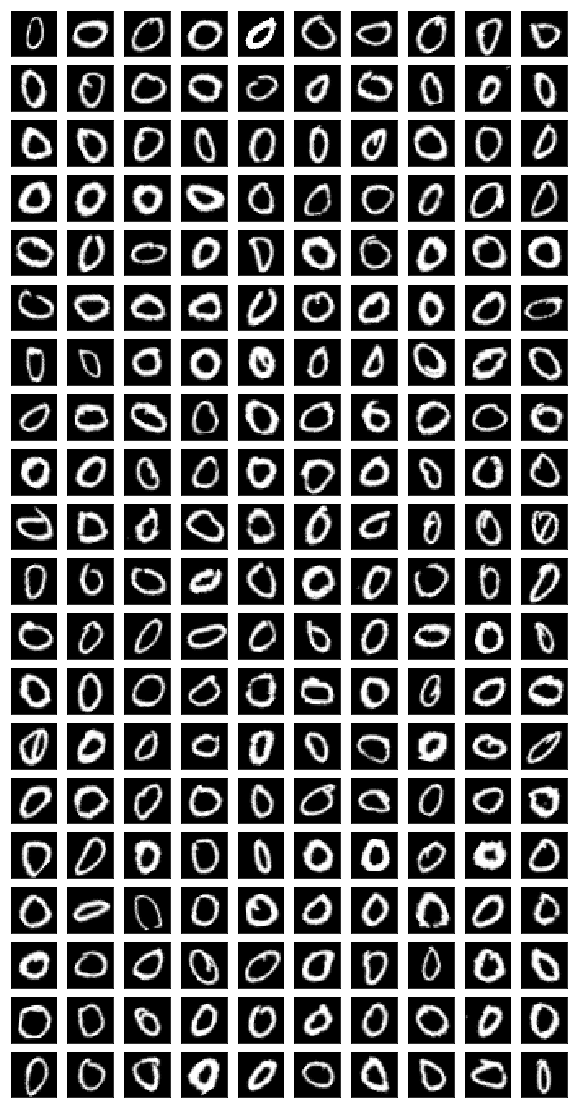

In [411]:
print_mnist_img_digit(x_train_plus[4000:6000], y_train_plus[4000:6000], 0)